In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


output_dir = "plots/study"
os.makedirs(output_dir, exist_ok=True)

df_study_manual = pd.read_csv("results/manual_evaluation_results.csv")
df_study_prototype = pd.read_csv("results/prototype_evaluation_results.csv")
df_survey = pd.read_csv("results/survey_results.csv")

df_study_manual["source"] = "Manual"
df_study_prototype["source"] = "Prototype"

combined_df = pd.concat([df_study_manual, df_study_prototype], ignore_index=True)

custom_palette={
    "Manual": "#27A4E7",
    "Prototype": "#8447FF"
}

plot_size=(6,3)

In [2]:
plt.figure(figsize=plot_size)
survey_mean = df_survey.mean()
survey_mean.plot(kind="bar", ylim=(1,5), title="Average Likert Scores per Question")
plt.ylabel("Average Likert Score")
plt.xlabel("Question")
plt.grid(False)
#plt.show()
for question, score in survey_mean.items():
    print(f"{question}: {score:.2f}")
plt.savefig(f"{output_dir}/study_avg_likert_questions.png", dpi=300, bbox_inches="tight")
plt.close()

q1: 4.14
q2: 4.71
q3: 4.29
q4: 4.71
q5: 4.43
q6: 4.71
q7: 4.57
q8: 4.43
q9: 3.86


In [3]:
plt.figure(figsize=plot_size)
sns.countplot(data=combined_df, x="score", hue="source", palette=custom_palette, dodge=True, width=0.5)
plt.title("Distribution of Reproducibility Scores")
plt.xlabel("Score")
plt.ylabel("Number of Papers")
plt.legend()
#plt.show()
print(combined_df.groupby("source")["score"].value_counts())
plt.savefig(f"{output_dir}/study_repro_scores.png", dpi=300, bbox_inches="tight")
plt.close()

source     score
Manual     3        8
           5        3
           1        1
           2        1
           4        1
Prototype  3        8
           4        3
           5        3
Name: count, dtype: int64


In [4]:
plt.figure(figsize=plot_size)
sns.countplot(data=combined_df, x="reproducible", hue="source", palette=custom_palette, order=["yes","no"], dodge=True, width=0.3)
plt.title("Reproducible vs Non-Reproducible")
plt.xlabel("Reproducible")
plt.ylabel("Number of Papers")
plt.legend()
#plt.show()
print(combined_df.groupby("source")["reproducible"].value_counts())
plt.savefig(f"{output_dir}/study_repro_vs_no.png", dpi=300, bbox_inches="tight")
plt.close()

source     reproducible
Manual     no              11
           yes              3
Prototype  no              11
           yes              3
Name: count, dtype: int64


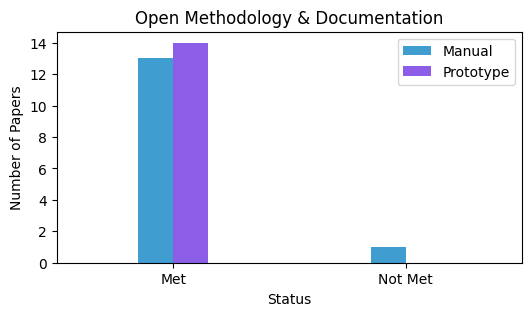

source     status 
Manual     Met        13
           Not Met     1
Prototype  Met        14
Name: count, dtype: int64


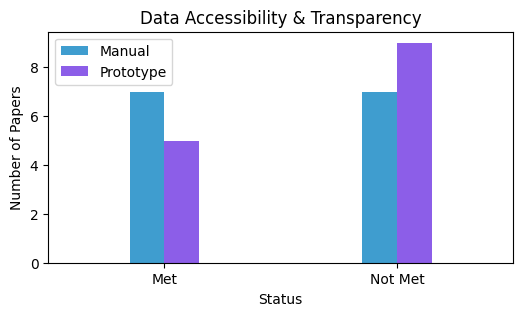

source     status 
Manual     Met        7
           Not Met    7
Prototype  Not Met    9
           Met        5
Name: count, dtype: int64


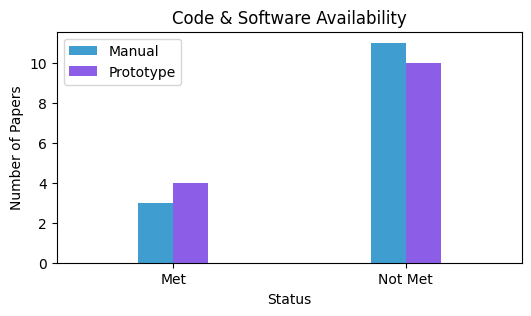

source     status 
Manual     Not Met    11
           Met         3
Prototype  Not Met    10
           Met         4
Name: count, dtype: int64


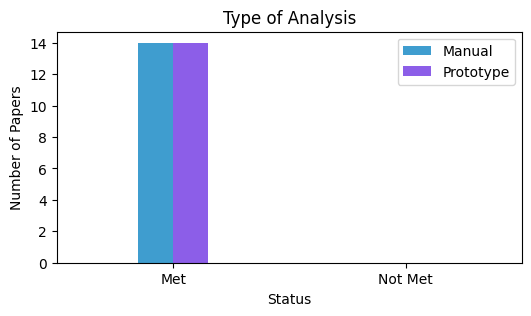

source     status
Manual     Met       14
Prototype  Met       14
Name: count, dtype: int64


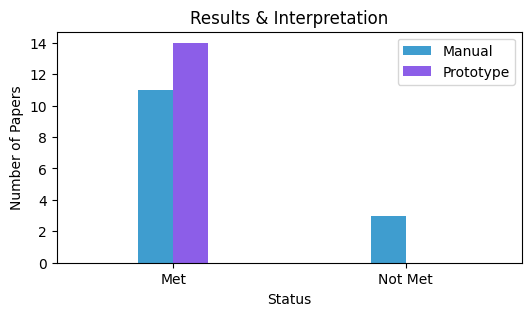

source     status 
Manual     Met        11
           Not Met     3
Prototype  Met        14
Name: count, dtype: int64


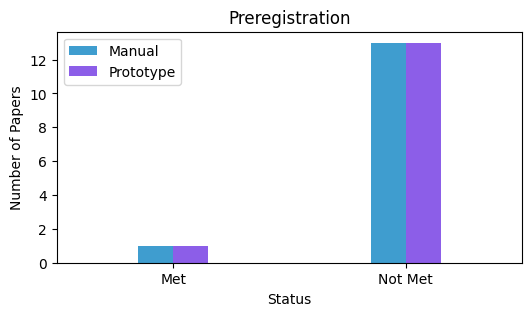

source     status 
Manual     Not Met    13
           Met         1
Prototype  Not Met    13
           Met         1
Name: count, dtype: int64


In [6]:
categories = combined_df.columns[3:-1]

for category in categories:
    plt.figure(figsize=plot_size)
    
    # Filter data for the current category
    subset = combined_df[[category, "source"]].rename(columns={category:"status"})
    
    # Create countplot
    sns.countplot(data=subset, x="status", hue="source", palette=custom_palette, order=["Met","Not Met"], dodge=True, width=0.3)
    
    # Plot formatting
    plt.title(f"{category}")
    plt.xlabel("Status")
    plt.ylabel("Number of Papers")
    plt.legend()
    plt.show()
    print(subset.groupby("source")["status"].value_counts())
    #plt.savefig(f"{output_dir}/study_{category}_compliance.png", dpi=300, bbox_inches="tight")
    #plt.close()